# Quantum Computing
Actividad Lección 10 || Programación Python para Big Data

Objetivos:
* Aprender más sobre Computación Cuántica
* Fomentar la proactividad

Datos del alumno:
* Víctor Luque Martín
* Máster Avanzado en Programación en Python para Hacking, BigData y Machine Learning

Fecha: 07/10/2022

# Tabla de contenidos:
1. [Ejercicio de Qiskit](#qiskit)
    1. [Instalación qiskit en CMD](#instalacion)
    2. [Importamos todo de qiskit](#importes)
    3. [Creamos el circuito](#circuito)
    4. [Dibujamos el circuito](#dibujar)
    5. [Medición de los bits cuánticos](#medicion)
    6. [Ejecutar el ejercicio en nuestro ordenador](#ejecutar)
    7. [Ejecución en quantum computer](#ejecutar-en-qc)
2. [Estados de Bell](#estados-bell)
3. [Ejercicio de CIRQ](#cirq)
    1. [Instalación CIRQ](#instalacion-cirq)
    2. [Importamos todo de CIRQ](#importes-cirq)
    3. [Creación de Qubits](#qubits-cirq)
    4. [Puertas y Operaciones](#puertas-cirq)
    5. [Circuitos y momentos](#momentos-cirq)
    6. [Circuitos y dispositivos](#dispositivos-cirq)
    7. [Simulación](#simulacion-cirq)
    8. [Visualización de resultados](#visualizacion-cirq)
    9. [Uso de barridos de parámetros](#barridos-cirq)
    10. [Matrices unitarias y descomposiciones](#matrices-cirq)
    11. [Transformadores](#transformadores-cirq)
4. [Certificaciones](#certificaciones)
    1. [Certificaciones SQL](#cert-sql)
    2. [Certificaciones NoSQL](#cert-nosql)
    3. [Certificaciones BIG DATA](#cert-big-data)

# Parte 1: Ejercicio de Qiskit <a class="anchor" id="qiskit"></a>

## Instalación qiskit en CMD <a class="anchor" id="instalacion"></a>

In [1]:
# !pip install qiskit
# mejor en cmd

## Importamos todo de qiskit <a class="anchor" id="importes"></a>

In [2]:
from qiskit import *
import qiskit

Compruebo la versión

In [3]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.21.2', 'qiskit-aer': '0.11.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.38.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [4]:
for ele, ver in qiskit.__qiskit_version__.items():
    print(ele, ver)

qiskit-terra 0.21.2
qiskit-aer 0.11.0
qiskit-ignis None
qiskit-ibmq-provider 0.19.2
qiskit 0.38.0
qiskit-nature None
qiskit-finance None
qiskit-optimization None
qiskit-machine-learning None


In [5]:
for ver in qiskit.__qiskit_version__.items():
    print(ver)

('qiskit-terra', '0.21.2')
('qiskit-aer', '0.11.0')
('qiskit-ignis', None)
('qiskit-ibmq-provider', '0.19.2')
('qiskit', '0.38.0')
('qiskit-nature', None)
('qiskit-finance', None)
('qiskit-optimization', None)
('qiskit-machine-learning', None)


## Creamos el circuito <a class="anchor" id="circuito"></a>
La mayoría de los circuitos serán una combinación de registros clásicos y cuánticos
**Los registros cuánticos** son usados para:
- Realizar operaciones mecánicas cuánticas en qubits
**Los registros clásicos**:
- Serán usados para realizar operaciones clásicas de las medidas obtenidas.

In [6]:
# registro cuántico de 2 qubits
qr = QuantumRegister(2)
qr

QuantumRegister(2, 'q0')

In [7]:
# registro clásico de 2 bits
cr = ClassicalRegister(2)
cr

ClassicalRegister(2, 'c0')

In [8]:
# Construcción del circuito
circuit = QuantumCircuit(qr, cr)
circuit

## Dibujamos el circuito <a class="anchor" id="dibujar"></a>

In [9]:
%matplotlib inline

In [10]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

**Vemos 2  bits cuánticos y 2 bits clásicos**
**Bits cuánticos: (q0_0) y q(0_1)**

In [11]:
# Con el objetivo de crear "entanglement" (entrelazamiento cuántico)
# Lo 1º es aplicar la puerta Hadamard en el primer qubit (q0_0)
# Con ello logramos la "superposicion"
# Al aplicar el operador H produce que un qubit pase de una estado básico |0⟩ o |1⟩,
# A un estado de superposición equiprobable de ambos estados
# No dar mayor importancia ahora a esto...
circuit.h(qr[0])

In [12]:
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

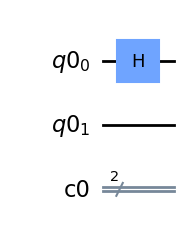

In [13]:
# Mejor visualizado
circuit.draw(output='mpl')

In [14]:
# Aparece la puerta Hadamard (Hadamard gate)
# Tal y como se pudo apreciar

In [15]:
# Ahora la puerta CNOT, que es una "Controlled-X gate"
# Y la puerta hace un NOT en qubit target si el qubit de control está en estado 1
# Por defecto todos los qubits son inicializados a 0

# En la siguiente ecuación:
# El de control (qr[0])
# El target (qr[1])

In [16]:
circuit.cx(qr[0], qr[1])

In [17]:
circuit.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

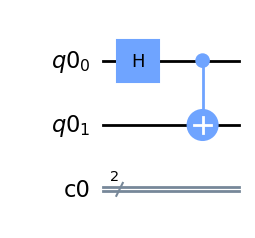

In [18]:
circuit.draw(output='mpl')

## Medición de los bits cuánticos <a class="anchor" id="medicion"></a>

In [19]:
# un experimento real termina por medir cada qubit
# Sin medición no podemos obtener información acerca del estado

In [20]:
circuit.measure(qr, cr)

In [21]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

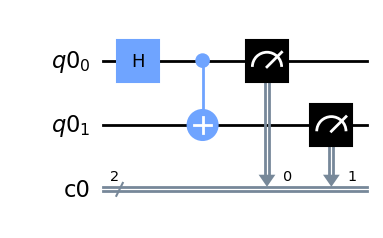

In [22]:
circuit.draw(output='mpl')

## Ejecutar el ejercicio en nuestro ordenador <a class="anchor" id="ejecutar"></a>

In [23]:
backend_simulator = Aer.get_backend('qasm_simulator')
backend_simulator

QasmSimulator('qasm_simulator')

In [24]:
# Opcion 1
job_simulator = execute(circuit, backend_simulator)
job_simulator
# Opción 2 (e incluso...)
# execute(circuit, backend_simulator, shots=1024)

In [25]:
result = job_simulator.result()
result

Result(backend_name='qasm_simulator', backend_version='0.11.0', qobj_id='af20959b-056b-473a-9217-50c2c44b492c', job_id='22319ae0-b294-47f7-8154-ff9a7421d604', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 502, '0x3': 522}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-80', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), status=DONE, seed_simulator=3351516002, metadata={'batched_shots_optimization': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'sample_measure_time': 0.0009199, 'input_qubit_map': [[0, 0], [1, 1]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 6, 'fusion': {'enabled': False}}, time_taken=0.0044071)], date=2022-10-06T19:03:58.133937, s

In [26]:
result.status

'COMPLETED'

In [27]:
# Plot histogram
from qiskit.tools.visualization import plot_histogram

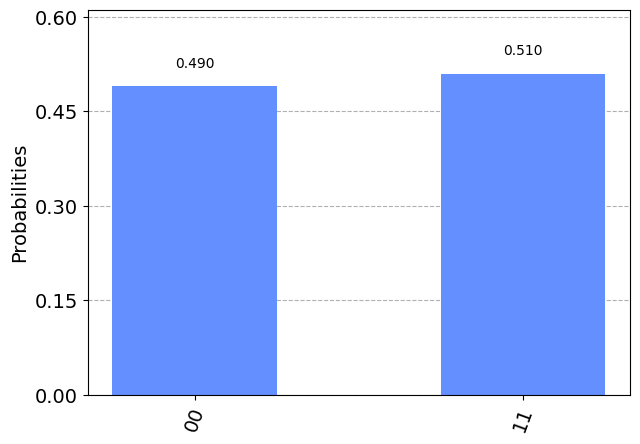

In [28]:
plot_histogram(result.get_counts(circuit))

## Ejecución en quantum computer <a class="anchor" id="ejecutar-en-qc"></a>

In [29]:
from qiskit import IBMQ

In [30]:
# IBMQ.save_account('API_TOKEN')
# Se ha borrado por seguridad mi API TOKEN
# CADA alumno/a deberá probar con la suya propia
# Una vez que se ejecuta esta celda, después, se puede omitir, ya se reconoce.
# No debes enseñar ese API TOKEN a los demás

In [31]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [32]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [33]:
provider = IBMQ.get_provider(hub='ibm-q')
provider

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [34]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [35]:
# Elijo el manila
qcomp = provider.get_backend('ibmq_belem')
qcomp


<IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>

In [36]:
job = execute(circuit, backend=qcomp)
job

In [37]:
from qiskit.tools.monitor import job_monitor

In [38]:
job_monitor(job)

Job Status: job has successfully run


In [39]:
result = job.result()
result

Result(backend_name='ibmq_belem', backend_version='1.0.50', qobj_id='2d302b36-27d4-45fc-bac7-0c907d0db993', job_id='633f0a87e212b04b8cbeed4f', success=True, results=[ExperimentResult(shots=4000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1905, '0x1': 93, '0x2': 82, '0x3': 1920}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.7853981633974483, memory_slots=2, metadata={}, n_qubits=5, name='circuit-80', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), status=done)], date=2022-10-06 19:31:30+02:00, status=Successful completion, header=QobjHeader(backend_name='ibmq_belem', backend_version='1.0.50'), execution_id='b51b4c26-459c-11ed-8a16-b02628f7f59e', time_taken=2.871654510498047, error=None, client_version={'qiskit': '0.38.0'})

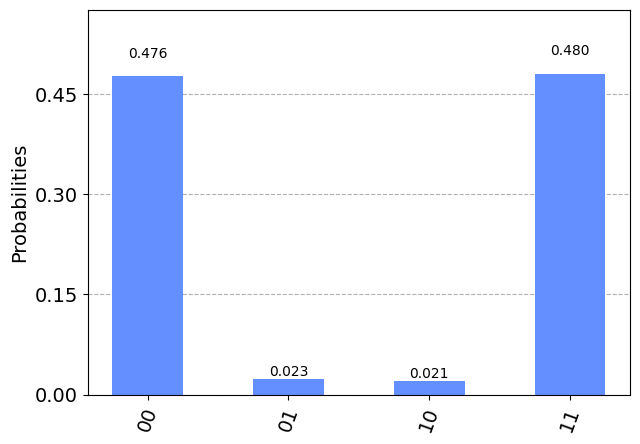

In [40]:
plot_histogram(result.get_counts(circuit))

In [41]:
# en este caso tenemos un resultado diferente
# el simulador lo que hace es simular un ordenador cuántico perfecto.
# pero simulado en un dispositivo cuántico real, (de IBM en este caso)
# hay algunos errores, que son corregidos día a día
# (errores cuánticos)

# Parte 2: Estados de Bell <a class="anchor" id="estados-bell"></a>

Los estados de Bell son estados cuánticos específicos de 2 qubits, que representa el ejemplo más simple del entrelazamiento cuántico. Se trata de una combinación lineal de estos estados, en total pueden ser 4 estados de Bell, donde se deben correlar las medidas de base {|0⟩, |1⟩} y las de base {|+⟩, |−⟩}. Los resultados pueden ser los siguientes:
- |00⟩ + |11⟩
- |00⟩ - |11⟩
- |01⟩ + |10⟩
- |01⟩ - |10⟩


# Parte 3: Ejercicio de CIRQ <a class="anchor" id="cirq"></a>

## Instalación CIRQ <a class="anchor" id="instalacion-cirq"></a>

In [42]:
# !pip install cirq

## Importamos todo de CIRQ <a class="anchor" id="importes-cirq"></a>

In [43]:
import cirq
import cirq_google

## Creación de Qubits <a class="anchor" id="qubits-cirq"></a>
La primera parte de la creación de un circuito cuántico es definir un conjunto de qubits (también conocido como registro cuántico) para actuar.
Cirq tiene tres formas principales de definir qubits:

- [`cirq.NamedQubit`](https://quantumai.google/reference/python/cirq/NamedQubit): se utiliza para etiquetar qubits con un nombre abstracto.
- [`cirq.LineQubit`](https://quantumai.google/reference/python/cirq/LineQubit): qubits etiquetados por número en una matriz lineal.
- [`cirq.GridQubit`](https://quantumai.google/reference/python/cirq/GridQubit): qubits etiquetados por dos números en una red rectangular.

In [44]:
# Uso de NamedQubit para etiquetar qubits con un nombre abstracto
q0 = cirq.NamedQubit('source')
q1 = cirq.NamedQubit('target')

# Uso de LineQubits para etiquetar qubits con un número en una matriz lineal
q3 = cirq.LineQubit(3)

# Los LineQubit se pueden crear tambien en un rango
q0, q1, q2 = cirq.LineQubit.range(3)

# Los GridQubits son etiquetados por dos numeros en una red rectangular
q4_5 = cirq.GridQubit(4, 5)

# Es posible crear en masa como un cuadrado
# Crearemos 16 qubits desde (0,0) hasta (3,3)
qubits = cirq.GridQubit.square(4)

También hay conjuntos preempaquetados de qubits llamados [Dispositivos](https://quantumai.google/cirq/hardware/devices). Estos son qubits junto con un conjunto de reglas sobre cómo se pueden usar. Se [`cirq.Device`](https://quantumai.google/reference/python/cirq/Device) puede usar para garantizar que las puertas de dos qubits solo se apliquen a los qubits adyacentes en el hardware y otras restricciones. El siguiente ejemplo utilizará el [`cirq_google.Sycamore`](https://quantumai.google/reference/python/cirq_google#Sycamore) dispositivo que viene con cirq. Es una cuadrícula en forma de diamante con 54 qubits que imita el hardware anterior lanzado por Google.

In [45]:
cirq_google.Sycamore

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

## Puertas y Operaciones <a class="anchor" id="puertas-cirq"></a>
El siguiente paso es usar los qubits para crear operaciones que se puedan usar en el circuito. Cirq tiene dos conceptos que es importante entender aquí:

- Una `Gate` es un efecto que se puede aplicar a un conjunto de qubits.
- Una `Operation` es una puerta aplicada a un conjunto de qubits.
Por ejemplo, es el [Hadamard](https://en.wikipedia.org/wiki/Quantum_logic_gate#Hadamard_(H)_gate) [`cirq.H`](https://quantumai.google/reference/python/cirq/H) cuántico y es un objeto. es un objeto y es la puerta de Hadamard aplicada a un qubit específico (línea qubit número 1).`Gate cirq.H(cirq.LineQubit(1)) Operation`

Muchas puertas de libros de texto están incluidas dentro de cirq. [`cirq.X`](https://quantumai.google/reference/python/cirq/X), [`cirq.Y`](https://quantumai.google/reference/python/cirq/Y) y [`cirq.Z`](https://quantumai.google/reference/python/cirq/Z) se refieren a las puertas de Pauli de un solo qubit. [`cirq.CZ`](https://quantumai.google/reference/python/cirq/CZ), [`cirq.CNOT`](https://quantumai.google/reference/python/cirq/CNOT), [`cirq.SWAP`](https://quantumai.google/reference/python/cirq/SWAP) son algunas de las puertas comunes de dos qubits. [`cirq.measure`](https://quantumai.google/reference/python/cirq/measure) es una macro para aplicar `MeasurementGate` a un conjunto de qubits. Puede encontrar más, así como instrucciones sobre cómo crear sus propias puertas personalizadas, en la página de [documentación de Gates](https://quantumai.google/cirq/build/gates) .

In [46]:
# Ejemplos de puertas
cnot_gate = cirq.CNOT
pauli_z = cirq.Z
# Uso de exponentes para obtener el cuadrado raiz de la puerta
sqrt_x_gate = cirq.X**0.5

# Algunas admiten parámetros
sqrt_sqrt_y = cirq.YPowGate(exponent=0.25)

# Creación de 2 qubits e una linea
q0, q1 = cirq.LineQubit.range(2)

# Algunas operaciones
z_op = cirq.Z(q0)
not_op = cirq.X(q0)
sqrt_iswap_op = cirq.SQRT_ISWAP(q0, q1)

# Se pueden usar las puertas usadas anteriormente
cnot_op = cirq.CNOT(q0, q1)
pauli_z_op = cirq.Z(q0)
sqrt_x_op = sqrt_x_gate(q0)
sqrt_sqrt_y_op = sqrt_sqrt_y(q0)

## Circuitos y momentos <a class="anchor" id="momentos-cirq"></a>
Ahora está listo para construir un circuito cuántico. A Circuites una colección de `Moment`s. A `Moment` es una colección de `Operation`s que actúan durante el mismo intervalo de tiempo abstracto. Cada uno `Operation` debe aplicarse a un conjunto inconexo de qubits en comparación con cada uno de los otros `Operation` en el `Moment`. Se `Moment` puede pensar en A como una rebanada vertical de un diagrama de circuito cuántico.

Los circuitos se pueden construir de varias maneras diferentes. De forma predeterminada, Cirq intentará deslizar su operación lo antes posible `Moment` cuando la inserte. Puede usar la función agregar de dos maneras:

Agregando cada operación una por una:

In [47]:
circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(3)
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.H(qubits[1]))
circuit.append(cirq.H(qubits[2]))
circuit

0: ───H───

1: ───H───

2: ───H───

O agregando algún iterable de operaciones. Una lista preconstruida funciona:

In [48]:
circuit = cirq.Circuit()
ops = [cirq.H(q) for q in cirq.LineQubit.range(3)]
circuit.append(ops)
print(circuit)

0: ───H───

1: ───H───

2: ───H───


También funciona un generador que rinde operaciones. Esta sintaxis se usará a menudo en la documentación y funciona tanto con el [`cirq.Circuit()`](https://quantumai.google/reference/python/cirq/Circuit) inicializador como con la [`cirq.Circuit.append()`](https://quantumai.google/reference/python/cirq/Circuit#append) función.

In [49]:
# Añadir con generador
circuit = cirq.Circuit()
circuit.append(cirq.H(q) for q in cirq.LineQubit.range(3))
print(circuit)
# Inicializador con generador
print(cirq.Circuit(cirq.H(q) for q in cirq.LineQubit.range(3)))

0: ───H───

1: ───H───

2: ───H───
0: ───H───

1: ───H───

2: ───H───


Tenga en cuenta que todas las puertas de Hadamard se empujan lo más a la izquierda posible y se colocan en el mismo momento, ya que ninguna se superpone.

Si sus operaciones se aplican a los mismos qubits, se colocarán en momentos secuenciales ordenados por inserción. En el siguiente ejemplo, las puertas de dos qubits se superponen y se colocan en momentos consecutivos.

In [50]:
print(cirq.Circuit(cirq.SWAP(q, q + 1) for q in cirq.LineQubit.range(3)))

0: ───×───────────
      │
1: ───×───×───────
          │
2: ───────×───×───
              │
3: ───────────×───


A veces, es posible que no desee que Cirq cambie automáticamente las operaciones completamente hacia la izquierda. Para construir un circuito sin hacer esto, puede crear el circuito momento a momento o usar un diferente `InsertStrategy`, explicado más en la [documentación del circuito](https://quantumai.google/cirq/build/circuits).

In [51]:
# Crea cada puerta en un momento separado pasando una iterable de Momentos en lugar de Operaciones.
print(cirq.Circuit(cirq.Moment([cirq.H(q)]) for q in cirq.LineQubit.range(3)))

0: ───H───────────

1: ───────H───────

2: ───────────H───


## Circuitos y dispositivos <a class="anchor" id="dispositivos-cirq"></a>
Una consideración importante al usar dispositivos cuánticos reales es que a menudo existen restricciones en los circuitos que pueden ejecutarse en el hardware. `Device` Los objetos especifican estas restricciones y se pueden usar para validar su circuito para asegurarse de que no contenga operaciones ilegales. Para obtener más información sobre qué restricciones `Device` pueden especificar los objetos y cómo usarlos, consulte la página [Dispositivos](https://quantumai.google/cirq/hardware/devices).

El siguiente ejemplo demuestra esto con el dispositivo Sycamore:

In [52]:
# Crear algunos qubits.
q0 = cirq.GridQubit(5, 6)
q1 = cirq.GridQubit(5, 5)
q2 = cirq.GridQubit(4, 5)

# Crear operaciones usando la puerta Sycamore, que es compatible con el dispositivo Sycamore.
# Sin embargo, cree operaciones para pares de qubits adyacentes y no adyacentes.
adjacent_op = cirq_google.SYC(q0, q1)
nonadjacent_op = cirq_google.SYC(q0, q2)

# Un circuito funcional para el dispositivo Sycamore no genera problemas.
working_circuit = cirq.Circuit()
working_circuit.append(adjacent_op)
valid = cirq_google.Sycamore.validate_circuit(working_circuit)

# Un circuito que usa operaciones no válidas.
bad_circuit = cirq.Circuit()
bad_circuit.append(nonadjacent_op)
try:
    cirq_google.Sycamore.validate_circuit(bad_circuit)
except ValueError as e:
    print(e)

Qubit pair is not valid on device: (cirq.GridQubit(5, 6), cirq.GridQubit(4, 5)).


## Simulación <a class="anchor" id="simulacion-cirq"></a>
Los resultados de la aplicación de un circuito cuántico se pueden calcular mediante un `Simulator`. Cirq viene con un simulador que puede calcular los resultados de los circuitos hasta un límite de 20 qubits. Se puede inicializar con [`cirq.Simulator()`](https://quantumai.google/reference/python/cirq/Simulator).

Hay dos enfoques diferentes para usar un simulador:

- `simulate()`: Al simular un circuito de forma clásica, un simulador puede acceder directamente y ver la función de onda resultante. Esto es útil para depurar, aprender y comprender cómo funcionarán los circuitos.
- `run()`: cuando usamos dispositivos cuánticos reales, solo podemos acceder al resultado final de un cálculo y debemos muestrear los resultados para obtener una distribución de resultados. Ejecutar el simulador como un muestreador imita este comportamiento y solo devuelve cadenas de bits como salida.

In [53]:
# Crear un circuito para generar un estado de Bell:
# 1/sqrt(2) * ( |00⟩ + |11⟩ )
bell_circuit = cirq.Circuit()
q0, q1 = cirq.LineQubit.range(2)
bell_circuit.append(cirq.H(q0))
bell_circuit.append(cirq.CNOT(q0, q1))

# Inicializar simulador
s = cirq.Simulator()

print('Simulate the circuit:')
results = s.simulate(bell_circuit)
print(results)

# Para la muestra, necesitamos agregar una medición al final
bell_circuit.append(cirq.measure(q0, q1, key='result'))

# Muestrear el circuito
samples = s.run(bell_circuit, repetitions=1000)

Simulate the circuit:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩


## Visualización de resultados <a class="anchor" id="visualizacion-cirq"></a>

Cuando utiliza `run()` para obtener una muestra de distribución de medidas, puede graficar directamente las muestras simuladas como un histograma con [`cirq.plot_state_histogram`](https://quantumai.google/reference/python/cirq/plot_state_histogram).

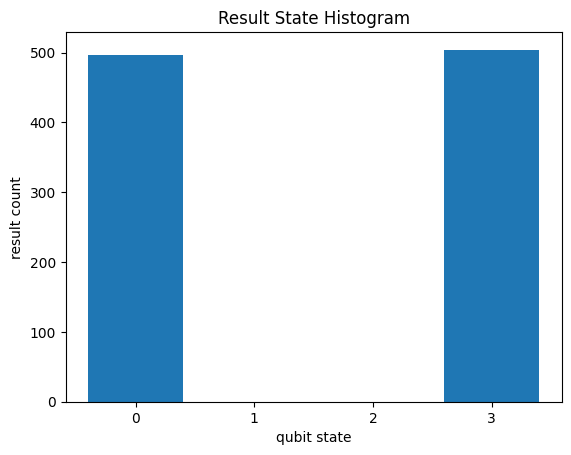

In [54]:
import matplotlib.pyplot as plt

cirq.plot_state_histogram(samples, plt.subplot())
plt.show()

Sin embargo, este histograma tiene algunos estados de qubits vacíos, lo que puede resultar problemático si trabaja con más qubits. Para graficar datos muestreados dispersos, primero obtenga `Counts` de sus resultados con su `histogram()` función y páselo a [`cirq.plot_state_histogram`](https://quantumai.google/reference/python/cirq/plot_state_histogram). Al recopilar los resultados en conteos, se ignoran todos los estados de qubit que nunca se vieron.

Counter({3: 504, 0: 496})


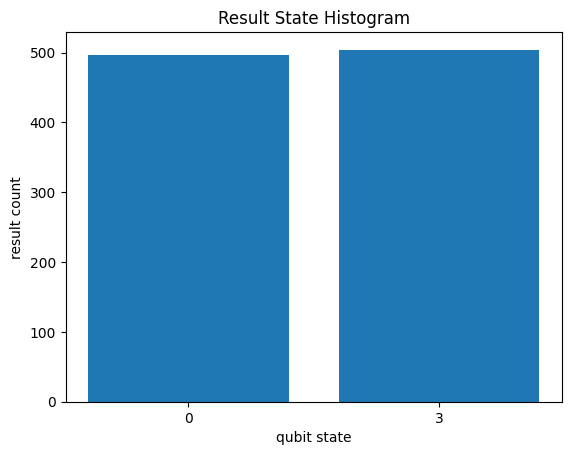

In [55]:
# Extracción de recuentos de histograma de la estructura de datos de resultados
counts = samples.histogram(key='result')
print(counts)

# Graficar los recuentos del histograma en lugar de los resultados
cirq.plot_state_histogram(counts, plt.subplot())
plt.show()

Un histograma sobre los estados que realmente se observaron a menudo puede ser más útil al analizar los resultados. Para obtener más información sobre las opciones disponibles para crear histogramas de resultados, consulte la página [Histogramas de estado](https://quantumai.google/cirq/simulate/state_histograms).

## Uso de barridos de parámetros <a class="anchor" id="barridos-cirq"></a>
Los circuitos Cirq permiten que las puertas tengan símbolos como parámetros libres dentro del circuito. Esto es especialmente útil para los algoritmos variacionales, que varían los parámetros dentro del circuito para optimizar una función de costo, pero puede ser útil en una variedad de circunstancias.

Para los parámetros, Cirq usa la biblioteca `sympy` para agregar `sympy.Symbol` parámetros a puertas y operaciones.

Una vez que el circuito esté completo, puede completar los valores posibles de cada uno de estos parámetros con un Sweep. Hay varias posibilidades que se pueden utilizar como barrido:

- [`cirq.Points`](https://quantumai.google/reference/python/cirq/Points): Una lista de valores especificados manualmente para un símbolo específico como una secuencia de flotantes.
- [`cirq.Linspace`](https://quantumai.google/reference/python/cirq/Linspace): Un barrido lineal desde un valor inicial hasta un valor final.
- [`cirq.ListSweep`](https://quantumai.google/reference/python/cirq/ListSweep): una lista de valores especificados manualmente para varios símbolos diferentes, especificados como una lista de diccionarios.
- [`cirq.Zipy`](https://quantumai.google/reference/python/cirq/Zip) y [`cirq.Product`](https://quantumai.google/reference/python/cirq/Product): Los barridos se pueden combinar en forma de lista comprimiéndolos juntos o a través de su producto cartesiano.
Un circuito parametrizado y un barrido juntos se pueden ejecutar usando el simulador u otro muestreador cambiando `run()` y `run_sweep()` agregando el barrido como un parámetro.

Aquí hay un ejemplo de barrido de un exponente de una puerta X:

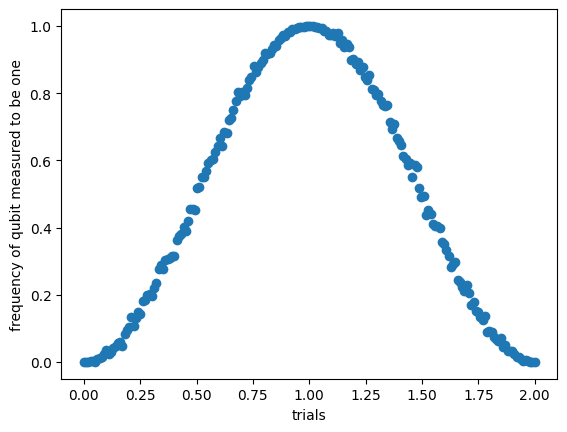

In [56]:
import sympy

# Realizar una puerta X con exponente variable
q = cirq.GridQubit(1, 1)
circuit = cirq.Circuit(cirq.X(q) ** sympy.Symbol('t'), cirq.measure(q, key='m'))

# Barrido del exponente de cero (apagado) a uno (encendido) y de vuelta a dos (apagado)
param_sweep = cirq.Linspace('t', start=0, stop=2, length=200)

# Simular el barrido
s = cirq.Simulator()
trials = s.run_sweep(circuit, param_sweep, repetitions=1000)

# Graficar todos los resultados
x_data = [trial.params['t'] for trial in trials]
y_data = [trial.histogram(key='m')[1] / 1000.0 for trial in trials]
plt.scatter('t', 'p', data={'t': x_data, 'p': y_data})
plt.xlabel("trials")
plt.ylabel("frequency of qubit measured to be one")
plt.show()

## Matrices unitarias y descomposiciones <a class="anchor" id="matrices-cirq"></a>
Muchas operaciones cuánticas tienen representaciones de matrices unitarias. Se puede acceder a esta matriz aplicando [`cirq.unitary(operation)`](https://quantumai.google/reference/python/cirq/unitary) a ese archivo `operation`. Esto se puede aplicar a puertas, operaciones y circuitos que admiten este protocolo y devolverá la matriz unitaria que representa el objeto. Consulte [Protocolos](https://quantumai.google/cirq/build/protocols) para obtener más información sobre este y otros protocolos.

In [57]:
print('Unitary of the X gate')
print(cirq.unitary(cirq.X))

print('Unitary of SWAP operator on two qubits.')
q0, q1 = cirq.LineQubit.range(2)
print(cirq.unitary(cirq.SWAP(q0, q1)))

print('Unitary of a sample circuit')
print(cirq.unitary(cirq.Circuit(cirq.X(q0), cirq.SWAP(q0, q1))))

Unitary of the X gate
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
Unitary of SWAP operator on two qubits.
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
Unitary of a sample circuit
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


## Descomposiciones de circuitos <a class="anchor" id="descomposiciones-cirq"></a>
Muchas puertas se pueden descomponer en un circuito equivalente con operaciones y puertas más simples. Esto se llama descomposición y se puede lograr con el [`cirq.decompose`](https://quantumai.google/reference/python/cirq/decompose) protocolo.

Por ejemplo, una puerta Hadamard H se puede descomponer en puertas X e Y:

In [58]:
print(cirq.decompose(cirq.H(cirq.LineQubit(0))))

[(cirq.Y**0.5).on(cirq.LineQubit(0)), cirq.XPowGate(global_shift=-0.25).on(cirq.LineQubit(0))]


Otro ejemplo es la puerta Toffoli de 3 qubits, que es equivalente a una puerta X controlada-controlada. Muchos dispositivos no admiten tres puertas qubit, por lo que es importante descomponerlas en una y dos puertas qubit.

In [59]:
q0, q1, q2 = cirq.LineQubit.range(3)
print(cirq.Circuit(cirq.decompose(cirq.TOFFOLI(q0, q1, q2))))

0: ───T────────────────@─────────────────────────────────@─────────────────────────────@────────────────────────────@───────────────────────────────────────
                       │                                 │                             │                            │
1: ───T───────Y^-0.5───@───Y^0.5────@───T^-1────Y^-0.5───@────────Y^0.5───@───Y^-0.5───@──────Y^0.5────@───Y^-0.5───@──────Y^0.5────@───────────────────────
                                    │                                     │                            │                            │
2: ───Y^0.5───X────────T───Y^-0.5───@───Y^0.5───T────────Y^-0.5───────────@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5───Y^0.5───X───


Lo anterior descompone el Toffoli en un conjunto más simple de puertas de un qubit y puertas CZ de dos qubits a costa de alargar considerablemente el circuito.

## Transformadores <a class="anchor" id="transformadores-cirq"></a>
El último concepto en este tutorial es el transformador. Un transformador puede tomar un circuito y modificarlo. Por lo general, esto implicará combinar o modificar operaciones para hacerlo más eficiente y más corto, aunque un transformador puede, en teoría, realizar cualquier tipo de manipulación de circuitos.

Por ejemplo, el [`cirq.merge_single_qubit_gates_to_phxz`](https://quantumai.google/reference/python/cirq/merge_single_qubit_gates_to_phxz)transformador tomará operaciones consecutivas de un solo qubit y las fusionará en una sola PhasedXZoperación.

In [60]:
q = cirq.GridQubit(1, 1)
c = cirq.Circuit(cirq.X(q) ** 0.25, cirq.Y(q) ** 0.25, cirq.Z(q) ** 0.25)
print(c)
c = cirq.merge_single_qubit_gates_to_phxz(c)
print(c)

(1, 1): ───X^0.25───Y^0.25───T───
(1, 1): ───PhXZ(a=0.304,x=0.333,z=0.142)───


Otros transformadores pueden ayudar a transformar un circuito en operaciones que son operaciones nativas en dispositivos de hardware específicos. Puede encontrar más información sobre los transformadores y cómo crear los suyos propios en [Transformadores](https://quantumai.google/cirq/transform/transformers).

# Parte 4: Certificaciones <a class="anchor" id="certificaciones"></a>

## Certificaciones SQL <a class="anchor" id="cert-sql"></a>
Tras haber hablado de PostgreSQL, se mencionarán a continuación algunas certificaciones relacionadas con PostgreSQL:
- [**Certificación Associate de PostgreSQL**](https://www.abatic.net/courses/abatic-certified-associate-for-postgresql-13)
- [**Certificación Professional de PostgreSQL**](https://www.abatic.net/courses/abatic-certified-professional-for-postgresql-13/)

## Certificaciones NoSQL <a class="anchor" id="cert-nosql"></a>
A continuación se muestran algunas certificaciones sobre BBDD no relacionales:<br>
MongoDB:
- [**MongoDB Developer**](https://university.mongodb.com/certification/developer/about): Mencionada en el manual, para construir aplicaciones utilizando MongoDB
- [**MongoDB Database Administrator**](https://university.mongodb.com/certification/dba/about): Para crear, mantener y securidad la infraestructura MongoDB

ElasticSearch:
- [**Elastic Certified Engineer**](https://www.elastic.co/es/training/elastic-certified-engineer-exam): Certificación para expertos que pueden instalar y administrar clústeres, así como desarrollar soluciones de búsqueda.
- [**Elastic Certified Analyst**](https://www.elastic.co/es/training/elastic-certified-analyst-examhttps://www.elastic.co/es/training/elastic-certified-observability-engineer): Certificación para expertos de Kibana que dominan la visualización de datos y el análisis avanzado.
- [**Elastic Certified Observability Engineer**](https://www.elastic.co/es/training/elastic-certified-observability-engineer): Certificación para expertos que pueden implementar la observabilidad para monitorear y reaccionar ante eventos en cualquier lugar. 

Apache CouchDB
- [**Apache CouchDB Professional**](https://www.vskills.in/certification/tutorial/certified-apache-couchdb-professional/): Conocimiento del candidato de la base de datos CouchDB y validará sus habilidades en varias áreas de Apache CouchDB para instalar, administrar y desarrollar aplicaciones

## Certificaciones BIG DATA <a class="anchor" id="cert-big-data"></a>
A continuación se muestran algunas certificaciones interesantes relacionadas con BIG DATA:
- [**Profesional de Análisis Certificado (CAP)**](https://www.certifiedanalytics.org/)
- [**Certificado profesional de ciencia de datos de IBM**](https://es.coursera.org/professional-certificates/certificado-profesional-de-ciencia-de-datos-de-ibm)
- [**Certificación de Microsoft: Fundamentos de Azure AI**](https://learn.microsoft.com/es-es/certifications/azure-ai-fundamentals/)
- [**Certificado por Microsoft: Azure Data Scientist Associate**](https://learn.microsoft.com/es-es/certifications/azure-data-scientist/)
- [**Científico de datos certificado por SAS**](https://www.sas.com/es_es/certification/credentials/advanced-analytics/data-scientist.html)
